This notebook uses the Velodrome architecture with mutation data as input data.

Velodrome reference: https://www.nature.com/articles/s42256-021-00408-w

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys

sys.path.append("../../vae_zinb_reprn/")
sys.path.append("../src/")

In [3]:
import datetime
import logging
import os
import time
import torch
import random

In [4]:
from dataset import (
    AggCategoricalAnnotatedCellLineDataset,
    AggCategoricalAnnotatedPdxDataset,
    AggCategoricalAnnotatedTcgaDataset    
)

In [5]:
from VelodromeModel import VelodromeTestBedMut

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'ldr': 0.15540545160882174,
 'lr': 0.2119250178709626,
 'lr1': 0.35936857013963164,
 'lr2': 0.23840000482276083,
 'wd': 0.068291677813977,
 'wd1': 0.04307906169444323,
 'wd2': 0.033650019373744726,
 'bs': 41,
 'epoch': 26,
 'lam1': 0.9,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.09999999999999998}

In [8]:
model_PACLITAXEL = VelodromeTestBedMut('PACLITAXEL')
model_PACLITAXEL.train_model(best_parameters)


-------------------- PACLITAXEL --------------------
Cell-line dataset for training Predictor 1: (243, 324)
Cell-line dataset for training Predictor 2: (243, 324)
Total no. of cell-lines for training: 486
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 122


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.30500314855720206


In [9]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,31,0.619565,0.842679,0.181348,0.328898,0.155829,0.40254


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


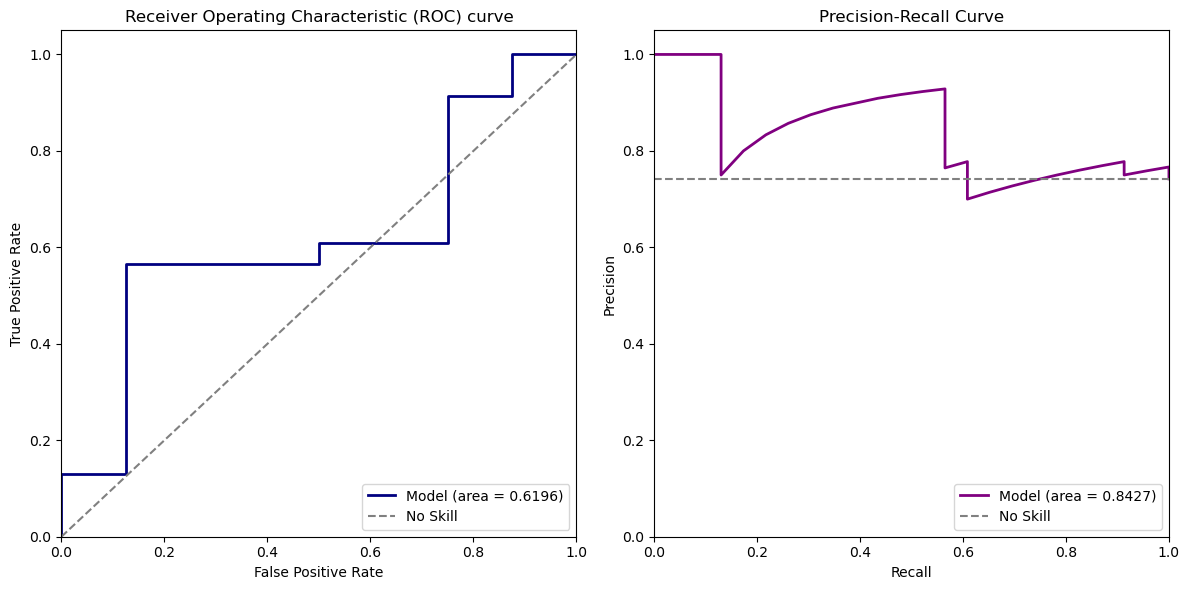

In [10]:
%matplotlib inline
model_PACLITAXEL.get_roc_pr_curves('PACLITAXEL', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [11]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedPdxDataset(is_train=None, only_cat_one_drugs=True)) # only 1 class label in test split for each drug

Dataset has only 1 class label for PACLITAXEL


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient i

,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,8,NaN,-0.0,NaN,NaN,NaN,NaN


In [12]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,68,0.214872,0.078468,0.244646,0.044361


In [13]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,608,0.255188,1.709373e-10,0.252793,2.557872e-10


### CISPLATIN

In [14]:
best_parameters = {'ldr': 0.15530690067447722,
 'lr': 0.1903265779465437,
 'lr1': 0.18974474186077714,
 'lr2': 0.397186015015468,
 'wd': 0.016454950449988247,
 'wd1': 0.07481435379944743,
 'wd2': 0.029947195556014775,
 'bs': 54,
 'epoch': 83,
 'lam1': 0.99,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.010000000000000009}

In [15]:
model_CISPLATIN = VelodromeTestBedMut('CISPLATIN')
model_CISPLATIN.train_model(best_parameters)


-------------------- CISPLATIN --------------------
Cell-line dataset for training Predictor 1: (193, 324)
Cell-line dataset for training Predictor 2: (193, 324)
Total no. of cell-lines for training: 386
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 97


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.23134495664479363


In [16]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,36,0.518519,0.747782,0.027789,0.87219,0.012162,0.943878


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


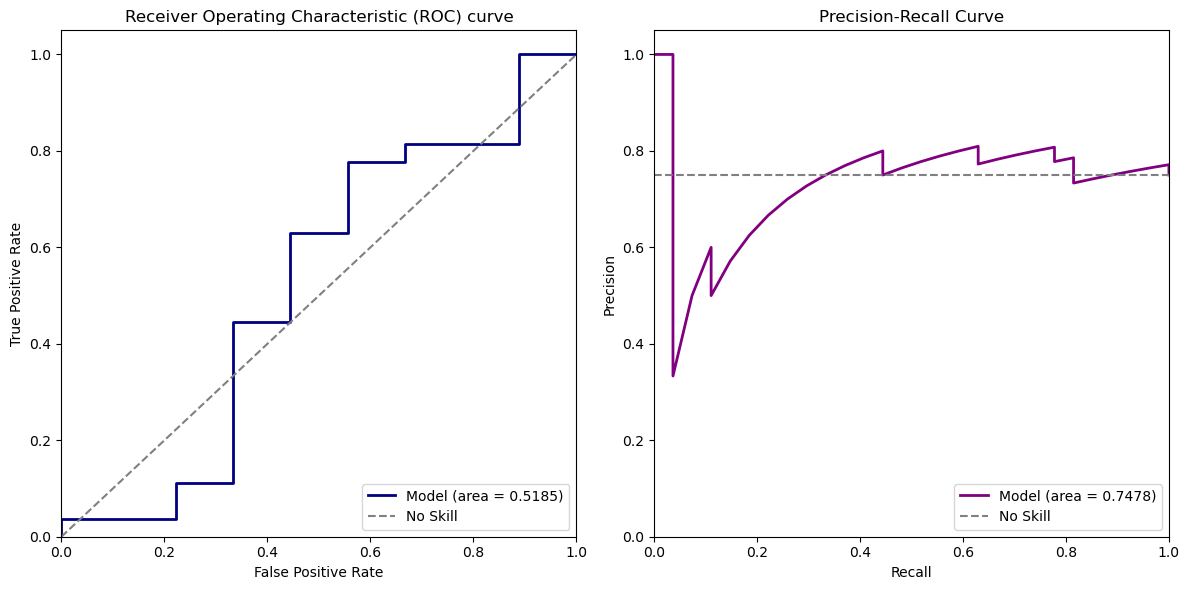

In [17]:
%matplotlib inline
model_CISPLATIN.get_roc_pr_curves('CISPLATIN', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [18]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,54,-0.055232,0.691608,-0.019285,0.889913


In [19]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,483,0.144568,0.001444,0.14224,0.001725


### 5-FLUOROURACIL

In [20]:
best_parameters = {'ldr': 0.10697538494170784,
 'lr': 0.42792848000937284,
 'lr1': 0.12155681204890967,
 'lr2': 0.13039214567087137,
 'wd': 0.04449015001192666,
 'wd1': 0.07051479113864151,
 'wd2': 0.04320565450168262,
 'lam1': 0.4,
 'bs': 36,
 'epoch': 74,
 'hd': 2,
 'gpu': 0,
 'seed': 42}

In [21]:
model_5_FLUOROURACIL = VelodromeTestBedMut('5-FLUOROURACIL')
model_5_FLUOROURACIL.train_model(best_parameters)


-------------------- 5-FLUOROURACIL --------------------
Cell-line dataset for training Predictor 1: (211, 324)
Cell-line dataset for training Predictor 2: (211, 324)
Total no. of cell-lines for training: 422
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 106


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Highest Pearson r achieved during training: 0.2787148481671996


In [22]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,21,0.882353,0.974291,0.520864,0.015476,0.532914,0.012868


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


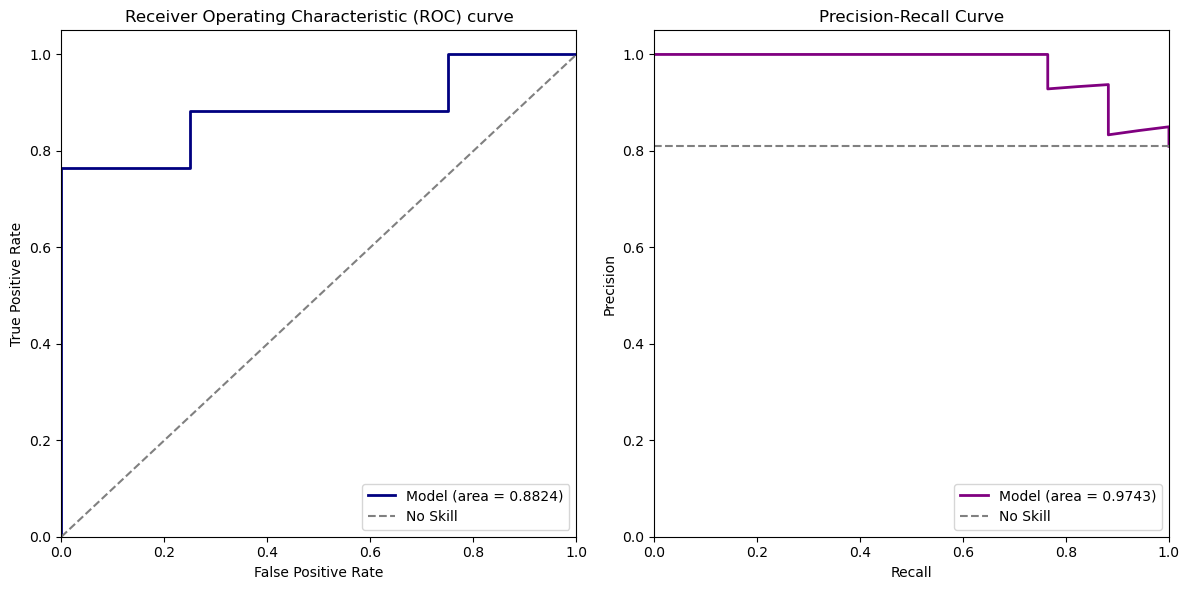

In [23]:
%matplotlib inline
model_5_FLUOROURACIL.get_roc_pr_curves('5-FLUOROURACIL', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [24]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedPdxDataset(is_train=None, only_cat_one_drugs=True)) # only 1 class label in test split for each drug

""


In [25]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,61,0.006584,0.959837,-0.151745,0.243041


In [26]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,528,0.154128,0.000379,0.104298,0.01651


### CYCLOPHOSPHAMIDE

In [27]:
best_parameters = {'ldr': 0.15650012463331223,
 'lr': 0.453393442094326,
 'lr1': 0.41976546999812125,
 'lr2': 0.06498492643237114,
 'wd': 0.0995179471731186,
 'wd1': 0.02392115854173899,
 'wd2': 0.06986873297691346,
 'lam1': 0.1,
 'bs': 45,
 'hd': 1,
 'epoch': 50,
 'batch_size': 64,
 'gpu': 0,
 'seed': 42}

In [28]:
model_CYCLOPHOSPHAMIDE = VelodromeTestBedMut('CYCLOPHOSPHAMIDE')
model_CYCLOPHOSPHAMIDE.train_model(best_parameters)


-------------------- CYCLOPHOSPHAMIDE --------------------
Cell-line dataset for training Predictor 1: (231, 324)
Cell-line dataset for training Predictor 2: (232, 324)
Total no. of cell-lines for training: 463
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 116


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Highest Pearson r achieved during training: 0.18797717267393674


In [29]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,19,0.558824,0.922719,0.062622,0.798968,0.085454,0.727964


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


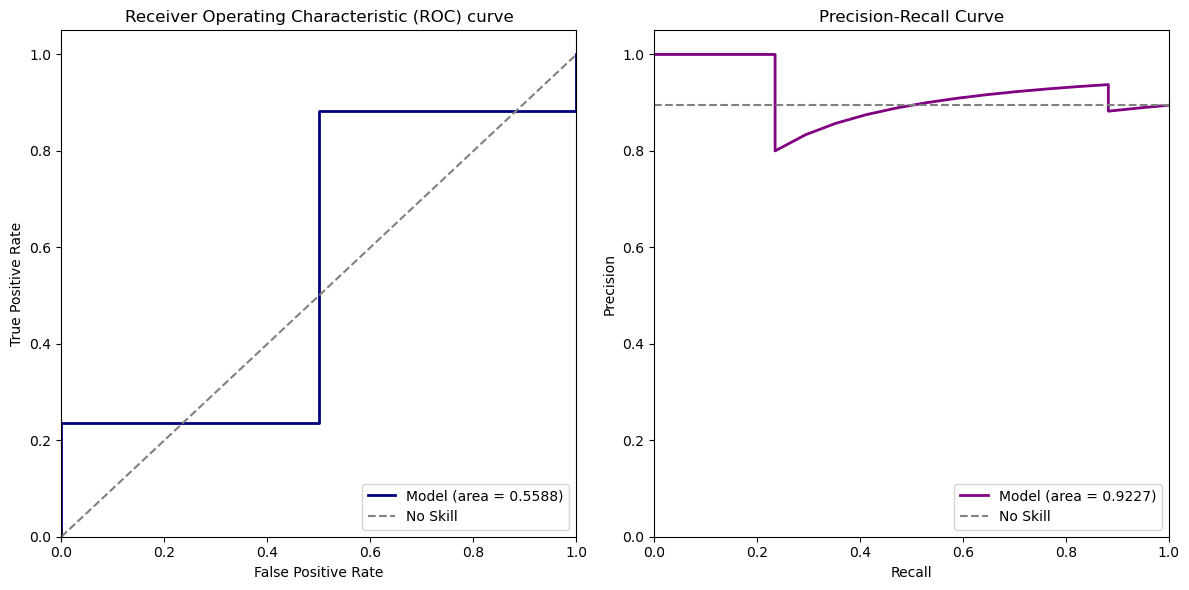

In [30]:
%matplotlib inline
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves('CYCLOPHOSPHAMIDE', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [31]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,66,0.201545,0.104638,0.204731,0.099151


In [32]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,579,0.26714,6.435800e-11,0.34385,1.636800e-17


### GEMCITABINE

In [33]:
best_parameters = {'ldr': 0.09379844733513892,
 'lr': 0.4051710378811695,
 'lr1': 0.4451237934269011,
 'lr2': 0.13998963556298985,
 'wd': 0.05734329822743312,
 'wd1': 0.02287861755602062,
 'wd2': 0.0665911034103483,
 'lam1': 0.4,
 'bs': 41,
 'epoch': 78,
 'hd': 1,
 'gpu': 0,
 'seed': 42}

In [34]:
model_GEMCITABINE = VelodromeTestBedMut('GEMCITABINE')
model_GEMCITABINE.train_model(best_parameters)


-------------------- GEMCITABINE --------------------
Cell-line dataset for training Predictor 1: (193, 324)
Cell-line dataset for training Predictor 2: (193, 324)
Total no. of cell-lines for training: 386
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 97


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.30677618941849016


In [35]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,18,0.518519,0.498765,0.032125,0.899304,0.09852,0.697331


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


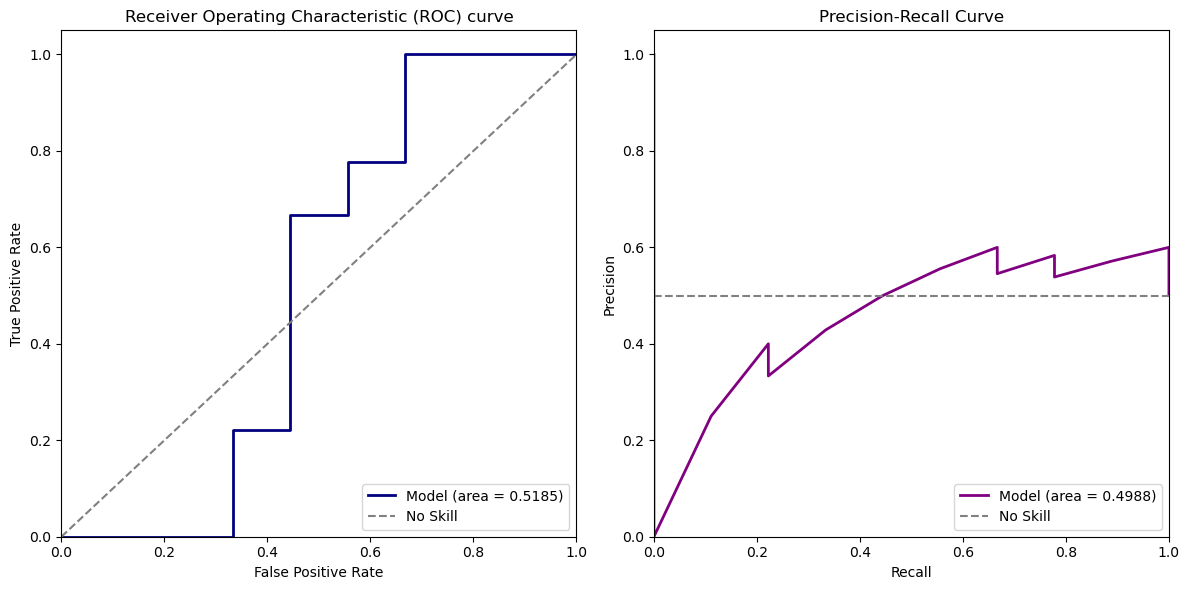

In [36]:
%matplotlib inline
model_GEMCITABINE.get_roc_pr_curves('GEMCITABINE', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [37]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,54,-0.074824,0.590764,-0.021418,0.877827


In [38]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,483,0.171817,0.000148,0.122973,0.006812
